### Importamos librerías a usar

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno

### Abrimos los archivos y realizamos un análisis exploratorio de datos

In [24]:
# Archivo de estaciones de cardio_alco.csv
cardio_alco=pd.read_csv(r'C:\Users\fsabena\OneDrive - MicroStrategy, Inc\Capacitaciones y Cursos\data\cardio_alco.csv',sep=';')
cardio_base=pd.read_csv(r'C:\Users\fsabena\OneDrive - MicroStrategy, Inc\Capacitaciones y Cursos\data\cardio_base.csv',sep=',')

In [25]:
## cardio_alco
cardio_alco.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [27]:
## cardio_base
cardio_base.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
5,8,21914,1,151,67.0,120,80,2,0
6,9,22113,1,157,93.0,130,80,3,0
7,12,22584,2,178,95.0,130,90,3,0
8,13,17668,1,158,71.0,110,70,1,0
9,14,19834,1,164,68.0,110,60,1,0


### Forma de los datasets

In [14]:
print('Filas-Columnas')
cardio_alco.shape

Filas-Columnas


(56903, 2)

In [28]:
print('Filas-Columnas')
cardio_base.shape

Filas-Columnas


(70000, 9)

### Hay valores faltantes?

In [16]:
cardio_alco.isna().sum()

id      0
alco    0
dtype: int64

In [33]:
cardio_base.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

### Información del dataset

In [18]:
cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


### Vamos a mostrar la geometría de los valores faltantes y como se relacionan entre ellos.

<AxesSubplot:>

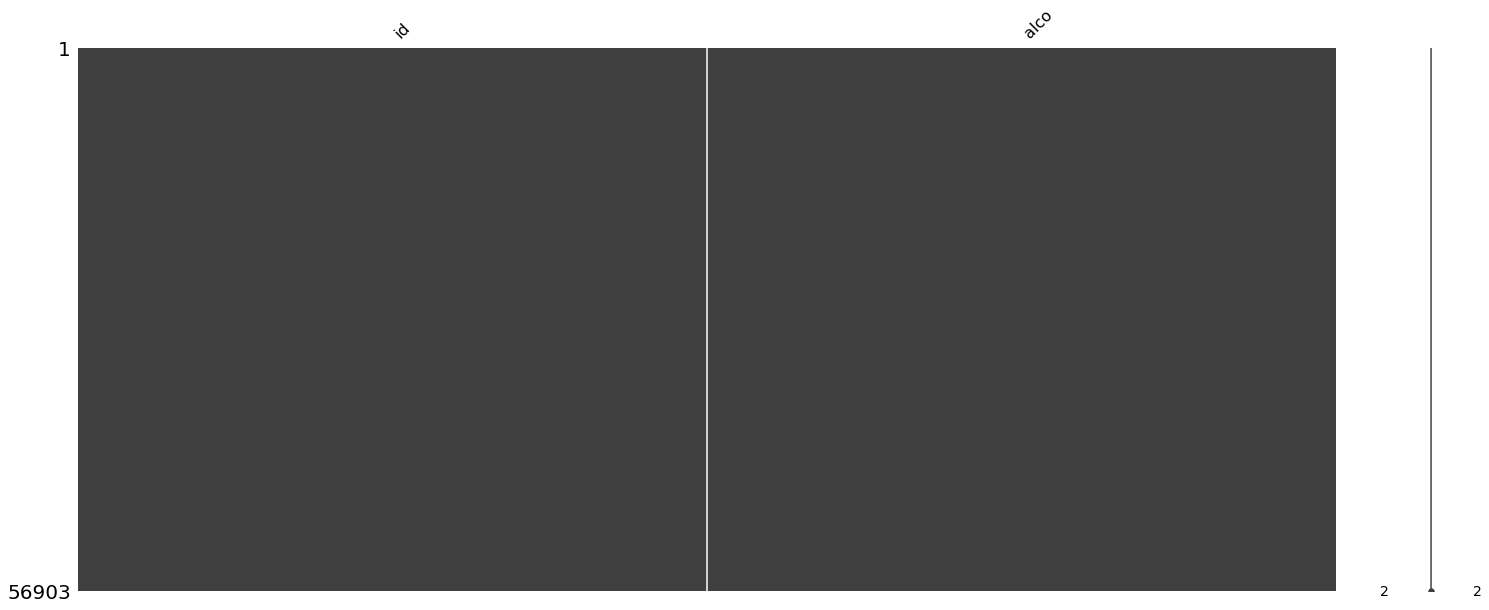

In [19]:
msno.matrix(cardio_alco)

In [45]:
### Uniendo datasets de acuerdo al id
merged=cardio_alco.merge(cardio_base, on="id", how="right")

In [48]:
merged

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,NaN,18393,2,168,62.0,110,80,1,0
1,1,NaN,20228,1,156,85.0,140,90,3,0
2,2,NaN,18857,1,165,64.0,130,70,3,0
3,3,NaN,17623,2,169,82.0,150,100,1,0
4,4,NaN,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,NaN,19240,2,168,76.0,120,80,1,1
69996,99995,NaN,22601,1,158,126.0,140,90,2,0
69997,99996,NaN,19066,2,183,105.0,180,90,3,0
69998,99998,NaN,22431,1,163,72.0,135,80,1,0


In [50]:
merged.groupby(['gender']).mean()

,id,alco,age,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,,,
1,49898.345267,0.025468,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
2,50110.246547,0.105242,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880


In [51]:
merged.groupby(['gender']).count()

,id,alco,age,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,,,
1,45530,36949,45530,45530,45530,45530,45530,45530,45530
2,24470,19954,24470,24470,24470,24470,24470,24470,24470
